# *dandelion* Notebook-3.5
![dandelion_logo](img/dandelion_logo.png)

## Plotting tools

As shown in notebook 3, dandelion can plot a the BCR network and also integrate with scanpy to use their plotting modules. This notebook will now show some other typical use plots for looking at BCR-seq analysis.

In [1]:
import os
import pandas as pd
os.chdir(os.path.expanduser('/Users/kt16/Documents/Github/dandelion'))
import dandelion as ddl
# change directory to somewhere more workable
os.chdir(os.path.expanduser('/Users/kt16/Documents/Clatworthy_scRNAseq/Ondrej/PIP/'))

/Users/kt16/miniconda3/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


I will work with the same example from the previous notebook for convenience.

#### Loading saved dandelion object

In [2]:
network = ddl.utl.Dandelion.load('Pan_immune_BCR/Pan_T7918901/dandelion/data/dandelion_results.pkl')

Because I've updated `dandelion` with a few things since the last version, I will use the utility function `utl.initialize_metadata` to update my metadata slot that should now contain new information.

In [3]:
ddl.utl.initialize_metadata(network)

## *barplot*
`pl.barplot` is a generic barplot function that will plot items in the metadata slot as a bar plot. This function will also interact with `AnnData` *.obs* slot if a scanpy object is used in place of `dandelion` object.

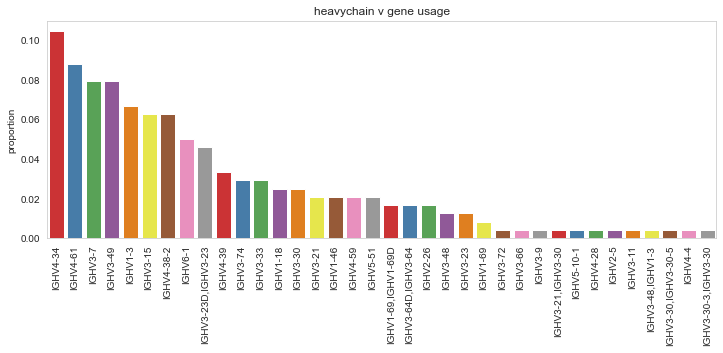

In [4]:
ddl.pl.barplot(network, variable = 'heavychain_v_gene', figsize = (12, 4))

## *stackedbarplot*
`pl.stackedbarplot` is similar to above but can split between specified groups. Some examples below:

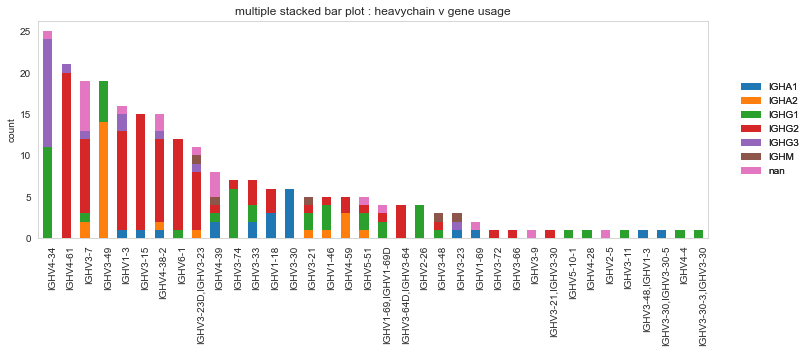

In [5]:
ddl.pl.stackedbarplot(network, variable = 'heavychain_v_gene', groupby = 'isotype')

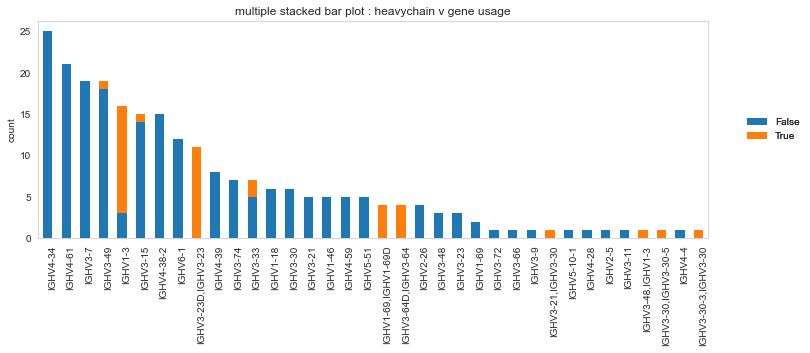

In [6]:
ddl.pl.stackedbarplot(network, variable = 'heavychain_v_gene', groupby = 'heavy_multi')

It's obviously more useful if you don't have too many groups, but you could try and plot everything and jiggle the legend options and color.

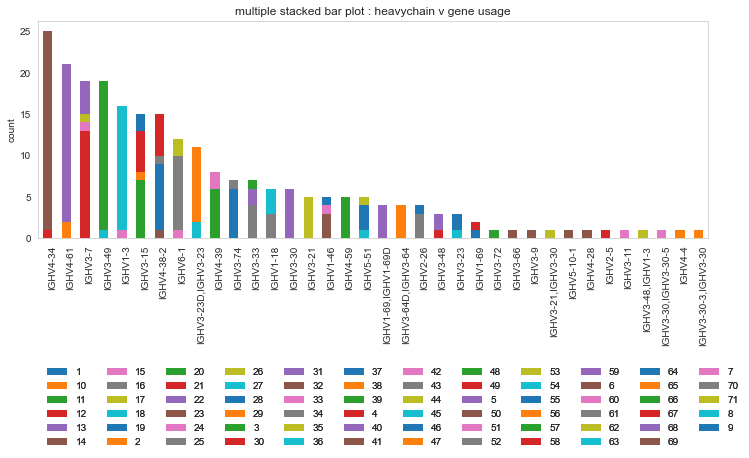

In [7]:
ddl.pl.stackedbarplot(network, variable = 'heavychain_v_gene', groupby = 'clone_group_id', legend_options = ('lower left', (0, -1), 12))

## *spectratypeplot*
Spectratype plots contain info displaying CDR3 length distribution for specified groups. For this function, the current method only works for `dandelion` objects as it requires access to the *.data* slotbut that might change in the future.

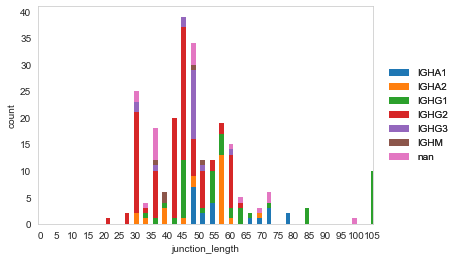

In [8]:
ddl.pl.spectratypeplot(network, variable = 'junction_length', groupby = 'c_call', locus='IGH', width = 1.5)

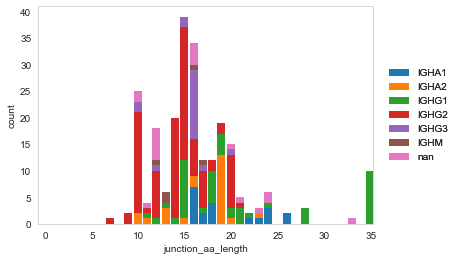

In [9]:
ddl.pl.spectratypeplot(network, variable = 'junction_aa_length', groupby = 'c_call', locus='IGH')

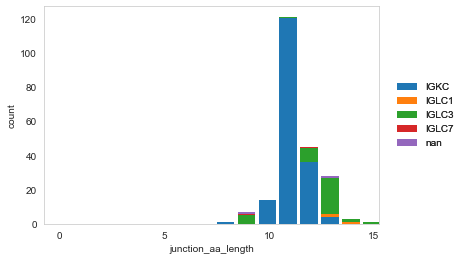

In [10]:
ddl.pl.spectratypeplot(network, variable = 'junction_aa_length', groupby = 'c_call', locus=['IGK','IGL'])

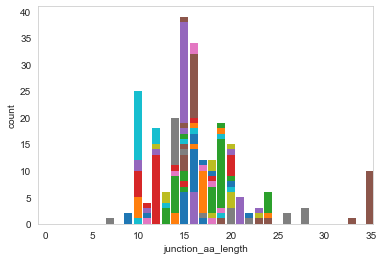

In [11]:
ddl.pl.spectratypeplot(network, variable = 'junction_aa_length', groupby = 'clone_group_id', locus='IGH', hide_legend = True)

That sums it up for now. Let me know if you have any ideas at [kt16@sanger.ac.uk] and I can try and see if i can implement it or we can work something out to collaborate on! See you for now!